In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score


# Reading data

In [10]:

combined_data_path = '../EDA_kaggle/combined_data.csv'
combined_data = pd.read_csv(combined_data_path)


print(combined_data.head())

   Age  BusinessTravel  DistanceFromHome  Education  EmployeeNumber  \
0   37               1                 1          4              77   
1   54               2                 1          4            1245   
2   34               2                 7          3             147   
3   39               1                 1          1            1026   
4   28               2                 1          3            1111   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobSatisfaction  \
0                        1       0               2         2                3   
1                        4       1               3         3                3   
2                        1       0               1         2                3   
3                        4       1               2         4                4   
4                        1       0               2         1                2   

   ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
0  ...              

In [11]:
combined_data.columns

Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Label', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_

# Fitting the model

In [12]:
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
model = SVC(kernel='linear', probability=True)  

model.fit(X_train, y_train)


y_pred = model.predict(X_test)  

  
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.89
Precision: 0.8571
Recall: 0.4286
F1 Score: 0.5714


###  Select Features

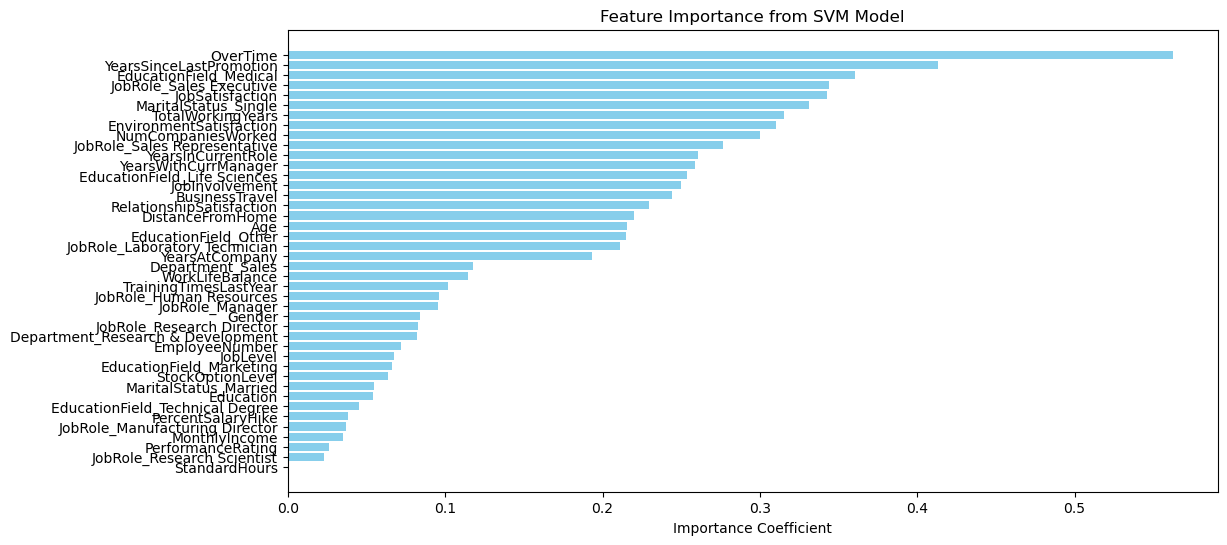

feature importance ranking:
                               Feature  Importance
12                           OverTime    0.562751
23            YearsSinceLastPromotion    0.413413
29             EducationField_Medical    0.360265
38            JobRole_Sales Executive    0.344155
9                     JobSatisfaction    0.342864
41               MaritalStatus_Single    0.331320
18                  TotalWorkingYears    0.315552
5             EnvironmentSatisfaction    0.310041
11                 NumCompaniesWorked    0.300136
39       JobRole_Sales Representative    0.276406
22                 YearsInCurrentRole    0.260946
24               YearsWithCurrManager    0.258757
27       EducationField_Life Sciences    0.253579
7                      JobInvolvement    0.249818
1                      BusinessTravel    0.244134
15           RelationshipSatisfaction    0.229726
2                    DistanceFromHome    0.220317
0                                 Age    0.215711
30               Educ

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear')

model.fit(X_train_scaled, y_train)

importance = np.abs(model.coef_[0])  

feature_names = X.columns.tolist() 

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Coefficient')
plt.title('Feature Importance from SVM Model')
plt.gca().invert_yaxis()  
plt.show()

print("feature importance ranking:\n", importance_df)


In [16]:
importance = np.abs(model.coef_[0])  

feature_names = X.columns.tolist()  

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_features = importance_df.head(21)

top_feature_indices = [feature_names.index(feature) for feature in top_features['Feature']]

X_selected = X.iloc[:, top_feature_indices]  

In [17]:
# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.90
Precision: 0.9459
Recall: 0.4167
F1 Score: 0.5785


## Addressing data imbalance

In [9]:
# Perform oversampling using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_selected_standardized, y)

# Split the oversampled dataset into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_res = model.predict(X_test_res)

# Calculate metrics
accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res)
recall = recall_score(y_test_res, y_pred_res)
f1 = f1_score(y_test_res, y_pred_res)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.76
Precision: 0.7380
Recall: 0.7580
F1 Score: 0.7479


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with balanced class weights
model = SVC(kernel='linear', class_weight='balanced', probability=True)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.77
Precision: 0.3910
Recall: 0.7262
F1 Score: 0.5083
